<h1>Does Location Relative to the Equator Correlate Weather Pattners?</h1>

<h2>Dependencies and Range of Latitude and Longitude</h2>

In [13]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

<h2>Acquire Cities</h2>

In [14]:
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

585

<h2>Pull Weather Data By City</h2>

In [3]:
#Function to iterate through cities and return dictionaries of weather data per city
city_weathers = []

def get_weather(indices):
    
    #for loop to go through the list of cities
    for city in range(len(indices)):
        
        #querey url
        base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
        query_url = base_url + str(indices[city]) + '&units=imperial' +'&appid=' + api_key
        
        # Get one of the posts
        city_response = requests.get(query_url).json()
        
        #error handling
        try:
            print(f"Processing Record {city + 1} of Set 1")
        
            #assign variables 
            city_country = city_response['sys']['country']
            city_date = city_response['dt']
            city_clouds = city_response['clouds']['all']
            city_humidity = city_response['main']['humidity']
            city_lat = city_response['coord']['lat']
            city_lng = city_response['coord']['lon']
            city_temp = city_response['main']['temp_max']
            city_wind = city_response['wind']['speed']
        
            city_weather = {
                "city": indices[city],
                "country": city_country,
                "date": city_date,
                "cloudiness": city_clouds,
                "humidity": city_humidity,
                "latitude": city_lat,
                "longitude": city_lng,
                "max temperature": city_temp,
                "wind speed": city_wind
                }
        
        
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
            city_weather = {
                "city": np.nan,
                "country": np.nan,
                "date": np.nan,
                "cloudiness": np.nan,
                "humidity": np.nan,
                "latitude": np.nan,
                "longitude": np.nan,
                "max temperature": np.nan,
                "wind speed": np.nan
            }
        
        #append each dictionary to the list called 
        if city_weather not in city_weathers:
            city_weathers.append(city_weather)

        
get_weather(cities)

Processing Record 1 of Set 1
Processing Record 2 of Set 1
Missing field/result... skipping.
Processing Record 3 of Set 1
Processing Record 4 of Set 1
Missing field/result... skipping.
Processing Record 5 of Set 1
Processing Record 6 of Set 1
Processing Record 7 of Set 1
Processing Record 8 of Set 1
Processing Record 9 of Set 1
Processing Record 10 of Set 1
Processing Record 11 of Set 1
Processing Record 12 of Set 1
Missing field/result... skipping.
Processing Record 13 of Set 1
Processing Record 14 of Set 1
Processing Record 15 of Set 1
Processing Record 16 of Set 1
Processing Record 17 of Set 1
Processing Record 18 of Set 1
Processing Record 19 of Set 1
Processing Record 20 of Set 1
Processing Record 21 of Set 1
Processing Record 22 of Set 1
Processing Record 23 of Set 1
Processing Record 24 of Set 1
Processing Record 25 of Set 1
Processing Record 26 of Set 1
Processing Record 27 of Set 1
Processing Record 28 of Set 1
Missing field/result... skipping.
Processing Record 29 of Set 1
Pro

Processing Record 244 of Set 1
Processing Record 245 of Set 1
Processing Record 246 of Set 1
Processing Record 247 of Set 1
Processing Record 248 of Set 1
Processing Record 249 of Set 1
Missing field/result... skipping.
Processing Record 250 of Set 1
Missing field/result... skipping.
Processing Record 251 of Set 1
Missing field/result... skipping.
Processing Record 252 of Set 1
Processing Record 253 of Set 1
Processing Record 254 of Set 1
Missing field/result... skipping.
Processing Record 255 of Set 1
Processing Record 256 of Set 1
Processing Record 257 of Set 1
Processing Record 258 of Set 1
Processing Record 259 of Set 1
Processing Record 260 of Set 1
Processing Record 261 of Set 1
Processing Record 262 of Set 1
Processing Record 263 of Set 1
Processing Record 264 of Set 1
Processing Record 265 of Set 1
Missing field/result... skipping.
Processing Record 266 of Set 1
Processing Record 267 of Set 1
Processing Record 268 of Set 1
Processing Record 269 of Set 1
Missing field/result... 

Processing Record 479 of Set 1
Processing Record 480 of Set 1
Processing Record 481 of Set 1
Processing Record 482 of Set 1
Processing Record 483 of Set 1
Processing Record 484 of Set 1
Missing field/result... skipping.
Processing Record 485 of Set 1
Processing Record 486 of Set 1
Processing Record 487 of Set 1
Processing Record 488 of Set 1
Processing Record 489 of Set 1
Missing field/result... skipping.
Processing Record 490 of Set 1
Processing Record 491 of Set 1
Processing Record 492 of Set 1
Processing Record 493 of Set 1
Processing Record 494 of Set 1
Processing Record 495 of Set 1
Processing Record 496 of Set 1
Processing Record 497 of Set 1
Missing field/result... skipping.
Processing Record 498 of Set 1
Processing Record 499 of Set 1
Processing Record 500 of Set 1
Processing Record 501 of Set 1
Processing Record 502 of Set 1
Processing Record 503 of Set 1
Processing Record 504 of Set 1
Processing Record 505 of Set 1
Processing Record 506 of Set 1
Processing Record 507 of Set 1

In [4]:
len(city_weathers)

551

<h2>Send Output to CSV</h2>

In [5]:
#write city_weathers to a csv

keys = city_weathers[0].keys()

output_data_file = "cities.csv"

with open(output_data_file, 'w') as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for weather in city_weathers:
            writer.writerow(weather)

<h2>Display Dataframe</h2>

In [16]:
#display the dataframe

df = pd.DataFrame(city_weathers)
weather_df = df.dropna()
weather_df.count()

city               550
cloudiness         550
country            550
date               550
humidity           550
latitude           550
longitude          550
max temperature    550
wind speed         550
dtype: int64

In [17]:
weather_df.head()

,city,cloudiness,country,date,humidity,latitude,longitude,max temperature,wind speed
0,porto velho,40.0,BR,1.551737e+09,94.0,-8.75,-63.87,78.80,2.24
2,vardo,1.0,US,1.551737e+09,31.0,39.62,-77.74,37.99,6.93
3,bethel,90.0,US,1.551737e+09,100.0,60.79,-161.76,37.40,13.87
4,vestmannaeyjar,0.0,IS,1.551737e+09,100.0,63.44,-20.27,30.55,6.62
5,waipawa,0.0,NZ,1.551737e+09,63.0,-39.94,176.59,62.05,10.54


<h2>Visualization</h2>

<h3>Latitude vs Temperature Plot</h3>

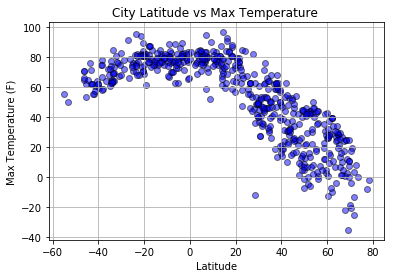

In [22]:
lat_temp_data = weather_df.groupby('city').sum()
y_axis_temp = lat_temp_data['max temperature']
x_axis_temp = lat_temp_data['latitude']
plt.scatter(x_axis_temp, y_axis_temp, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("City Latitude vs Max Temperature ")
plt.savefig("citylattemp.png")
plt.show()

<h4>Max Temperatures Relative to City Latitude</h4>
<p>Judging by the random sampling of coordinates taken from citipy, the city selection has a broad range of city locations. Of the 564 cities that came back with weather data, 398 cities were located at or above the equator, and 166 cities were located at or below the equator. As we move below the equator, we can see that the high temperature for the day remained above 60 degrees Fahrenheit up to the -40 degrees south Latitude point. That is a significantly longer range of high temperatures than those above the equator, where temperatures begin to drop below 60 degrees Fahrenheit at about the 20 degrees north Latitude point. This has a lot to do with the fact that we're approaching fall south of the equator. Temperatures can be expected to be more mild this time of year. In the north-western and north-eastern hemispheres above the equator, we are experiencing a long, frigid winter. At roughly the equator, temperatures remain above 60 degrees Fahrenheit, surprisingly cool. Between -40 degrees south Latitude and 20 degrees north Latitude, only 5 cities logged a high temperature for the day over 90 degrees Fahrenheit. Given the persistent colloquialism that the closer to the equator one goes the hotter it gets, it seems that city data for early March is recording milder temperatures.</p>

<h3>Latitude vs Humidity Plot</h3>

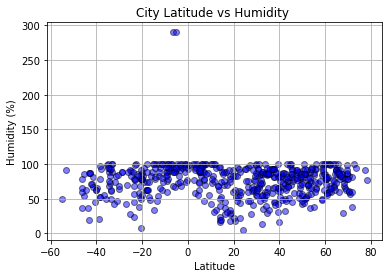

In [23]:
lat_humid_data = weather_df.groupby('city').sum()
x_axis_humid = lat_humid_data['latitude']
y_axis_humid = lat_humid_data['humidity']
plt.scatter(x_axis_humid, y_axis_humid, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity ")
plt.grid()
plt.savefig("citylathumid.png")
plt.show()

<h3>Latitude vs Cloudiness Plot</h3>

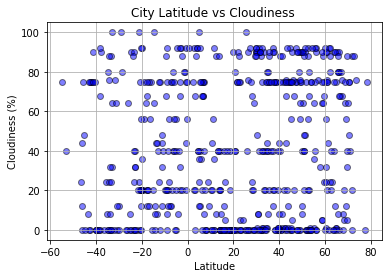

In [24]:
lat_clouds_data = weather_df.groupby('city').sum()
x_axis_clouds = lat_clouds_data['latitude']
y_axis_clouds = lat_clouds_data['cloudiness']
plt.scatter(x_axis_clouds, y_axis_clouds, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness ")
plt.grid()
plt.savefig("citylatclouds.png")
plt.show()

<h4>Cloudiness vs Location Relative to the Equator</h4>
<p>It would appear that directly near and south of the equator (north of -20 degrees south Latitude) cloudiness tends to taper off that day. Though relative humidity plays a role in cloud formation, it would appear that it is not necessarily a cause of cloud formation, which is the presence of water condensation in the atmosphere. Normally, clouds form when warm, humid air from the ground rises to an elevation cool enough to form condensation. As we see in the humidity figure, a large cluster of cities near the equator seemed to experience high humidity (approaching 100%). On the same day, same set of cities on the cloudiness figure, there is a gap corresponding to the cluster on the humidity figure. Some other mitigating factor plays a role in cloud formation, and it is my belief that elevation and population density may be the missing links. Without at least the elevation levels of those cities to visualize beside the humidity and cloudiness figures, there is no other reasonable explanation for the lack of clouds in cities near the equator experiencing near 100% relative humidity.</p>

<h3>Latitude vs Wind Speed</h3>

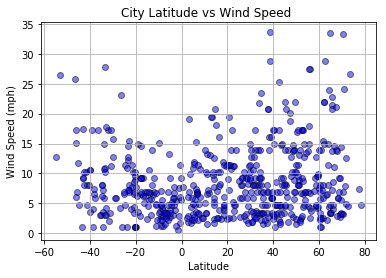

In [25]:
lat_wind_data = weather_df.groupby('city').sum()
x_axis_wind = lat_wind_data['latitude']
y_axis_wind = lat_wind_data['wind speed']
plt.scatter(x_axis_wind, y_axis_wind, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed ")
plt.grid()
plt.savefig("citylatwinds.png")
plt.show()

<h4>City Wind Speeds Relative to the Equator</h4>
<p>One cannot observe wind speed without also observing temperature. For example, the five cities noted previously whose high temperatures rose above 90 degrees Fahreheit can also be seen here as random outliers. Random they are not. As temperatures rise, air pressure increases. As air preassure increases from one area to the next, wind speeds increase. Also notice how those five are further away from the equator, where preasure changes are more volatile. Again, I don't see this as unusual. In the mild and temperate temperatures recorded yesterday, and given their spread in the temperature plot, we can see that the 166 cities recorded between -40 degrees south Latitude and 20 degrees north Latitude have a fairly concentrated selection of cities of low or zero windspeeds near the equator. As one moves further north of the equator, wind speeds become more varied, reaching above 22mph at roughly 40 degrees north Latitude. In other words, the relative uniformity of moderate temperatures nearer to the equator means longer gradients of air preassure, therefore slower wind speeds.</p>